In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import re
from matplotlib import rc

In [2]:
# 시각화 폰트 깨짐 방지
rc('font', family='AppleGothic')
plt.rcParams['font.family'] = 'AppleGothic'

# 간단한 전처리
### 1) datatype 형변환
### 2) 필요한 변수 열 추가
- 년/월/일
- 성별
- 할부 여부
- 판매 개수

In [3]:
! pip3 install seaborn

In [4]:
mydata = pd.read_csv("dummy1.csv", thousands = ',')

FileNotFoundError: [Errno 2] No such file or directory: 'dummy1.csv'

In [ ]:
# 각각의 타입보기

print(type(mydata['datetime'][0]))
print(type(mydata['category'][0]))
print(type(mydata['name'][0]))
print(type(mydata['mother_code'][0]))
print(type(mydata['revenue'][0]))
print(type(mydata['price'][0]))

In [95]:
# 가격 실수형으로 변환
mydata['price'] = mydata['price'].str.replace(',','')
mydata['price'] = mydata['price'].str.replace('   ','')
mydata['price'] = mydata['price'].str.replace('    ','')

In [165]:
mydata.apply(pd.to_numeric, errors = 'coerce') 
mydata['price'] = pd.to_numeric(mydata['price'])

In [96]:
# 매출 실수형으로 변환
pd.to_numeric(mydata['revenue'])

0        2099000.0
1        4371000.0
2        3262000.0
3        6955000.0
4        6672000.0
           ...    
38304          NaN
38305          NaN
38306          NaN
38307          NaN
38308          NaN
Name: revenue, Length: 38309, dtype: float64

In [293]:
# 매출 실수형으로 변환
mydata['month'] = pd.to_numeric(mydata['month'])
mydata['date'] = pd.to_numeric(mydata['date'])
mydata['year'] = pd.to_numeric(mydata['year'])

In [5]:
# 시간 분리
mydata[['year','month','date']] = pd.DataFrame(mydata.datetime.str.split('.', 2).tolist())

NameError: name 'mydata' is not defined

In [6]:
mydata[['date', 'time']] = pd.DataFrame(mydata.date.str.split(' ', 1).tolist())

NameError: name 'mydata' is not defined

In [384]:
# object 타입을 datetime64[ns] 타입으로
mydata['time'] = pd.to_datetime(mydata['time'], format='%H:%M').dt.time

ValueError: unconverted data remains: :00

In [392]:
mydata['datetime'] = pd.to_datetime(mydata['datetime'], format='%Y-%m-%d').dt.date

In [167]:
# 매출 / 단가 = count(수량) 변수로 추가
mydata['count'] = mydata['revenue'].div(mydata['price'], axis = 0)

In [393]:
mydata

,Unnamed: 0,datetime,exposure,mother_code,code,name,category,price,revenue,year,month,date,time,count,sex,installment
0,0,2019-01-01,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,2099000.0,2019,1,1,06:00:00,52.606516,남성,무관
1,1,2019-01-01,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,4371000.0,2019,1,1,06:00:00,109.548872,여성,무관
2,2,2019-01-01,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,3262000.0,2019,1,1,06:20:00,81.754386,남성,무관
3,3,2019-01-01,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,6955000.0,2019,1,1,06:20:00,174.310777,여성,무관
4,4,2019-01-01,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,6672000.0,2019,1,1,06:40:00,167.218045,남성,무관
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38304,38304,2020-01-01,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,00:20:00,NaN,무관,무관
38305,38305,2020-01-01,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,00:40:00,NaN,무관,무관
38306,38306,2020-01-01,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,01:00:00,NaN,무관,무관
38307,38307,2020-01-01,20.0,100490,201478,더케이 예다함 상조서비스(티포트),무형,NaN,NaN,2020,1,1,01:20:00,NaN,무관,무관


In [179]:
# 별로 좋은 방법은 아닌 것 같지만 pd다룰줄 몰라서... 
# sex(성별) 추가
for i in range(len(mydata)):
    if set(mydata['name'][i].split()) & {"남성"} :
        mydata['sex'][i] = "남성"
    elif set(mydata['name'][i].split()) & {"여성"} :
        mydata['sex'][i] = "여성"
    else :
        mydata['sex'][i] = "무관"

<ipython-input-179-35b7f07b7e81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['sex'][i] = "남성"
<ipython-input-179-35b7f07b7e81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['sex'][i] = "여성"
<ipython-input-179-35b7f07b7e81>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['sex'][i] = "무관"


In [216]:
# 이것도 별로 좋은 방법은 아니지만 원소를 직접추가하는 것보다는 좀 나은듯
# installment(할부) 추가
installment = []

for i in range(len(mydata)):
    if set(re.split('\[|\]|\(\)| ', mydata['name'][i])) & {"무이자"} :
        installment.append("무이자")
    elif set(re.split('\[|\]|\(\)| ', mydata['name'][i])) & {"일시불"} :
        installment.append("일시불")
    else :
        installment.append("무관")

In [217]:
mydata['installment'] = installment

In [218]:
mydata

,datetime,exposure,mother_code,code,name,category,price,revenue,year,month,date,time,count,sex,installment
0,2019.1.1 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,2099000.0,2019,1,1,6:00,52.606516,남성,무관
1,2019.1.1 6:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,4371000.0,2019,1,1,6:00,109.548872,여성,무관
2,2019.1.1 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,3262000.0,2019,1,1,6:20,81.754386,남성,무관
3,2019.1.1 6:20,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,6955000.0,2019,1,1,6:20,174.310777,여성,무관
4,2019.1.1 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,6672000.0,2019,1,1,6:40,167.218045,남성,무관
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38304,2020.1.1 0:20,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,0:20,NaN,무관,무관
38305,2020.1.1 0:40,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,0:40,NaN,무관,무관
38306,2020.1.1 1:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,1:00,NaN,무관,무관
38307,2020.1.1 1:20,20.0,100490,201478,더케이 예다함 상조서비스(티포트),무형,NaN,NaN,2020,1,1,1:20,NaN,무관,무관


In [410]:
mydata.to_csv('/Users/aohus/Documents/workspaces/Python/BigContest/src/dummy1.csv', sep=',', na_rep='NaN')

# EDA 시각화

## 무엇을 시도해볼까?
1. 최고 매출 순으로 30개 정도 확인
2. 최고 count 순으로 30개 확인
    + 1,2 번은 마더코드 같은 것끼리는 더해서해야하나?
3. 카테고리
    + 카테고리별 평균 매출
    + 카테고리 + 성별 매출
    + 월별 카테고리의 변화
4. 성별
    + 성별에 따른 매출
5. 가격
6. 월별 매출

### 매출 순위별로 sort

In [524]:
mydata.sort_values(by='revenue' ,ascending=False).head(10)

,datetime,exposure,mother_code,code,name,category,price,revenue,year,month,date,time,count,sex,installment
35784,2019-12-07 01:40:00,17.0,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900.0,322009000.0,2019,12,7,01:40:00,8070.401003,무관,무관
37861,2019-12-27 00:00:00,20.0,100323,201025,피시원 국내산 햇 손질문어 7팩,농수축,49900.0,270284000.0,2019,12,27,00:00:00,5416.513026,무관,무관
34385,2019-11-22 19:00:00,20.0,100317,201665,국내산 손질 햇 갑오징어 9팩,농수축,49900.0,241079000.0,2019,11,22,19:00:00,4831.242485,무관,무관
35045,2019-11-29 23:00:00,NaN,100148,200412,LG 울트라HD TV 65UM7900BNA,가전,1700000.0,231789000.0,2019,11,29,23:00:00,136.346471,무관,무관
32371,2019-11-02 17:40:00,20.0,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900.0,228177000.0,2019,11,2,17:40:00,3873.972835,무관,무관
34906,2019-11-28 16:20:00,20.0,100255,200869,한일 대용량 스텐 분쇄믹서기,주방,109800.0,225084000.0,2019,11,28,16:20:00,2049.945355,무관,무관
37356,2019-12-21 17:40:00,20.0,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900.0,223492000.0,2019,12,21,17:40:00,5601.303258,무관,무관
37256,2019-12-20 14:00:00,20.0,100558,201655,정직한 농부의 석류,건강기능,59900.0,216065000.0,2019,12,20,14:00:00,3607.095159,무관,무관
33178,2019-11-10 17:00:00,20.0,100253,200864,안동간고등어 20팩,농수축,30900.0,199541000.0,2019,11,10,17:00:00,6457.637540,무관,무관
36267,2019-12-11 00:00:00,20.0,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900.0,187419000.0,2019,12,11,00:00:00,4697.218045,무관,무관


### price - revenue

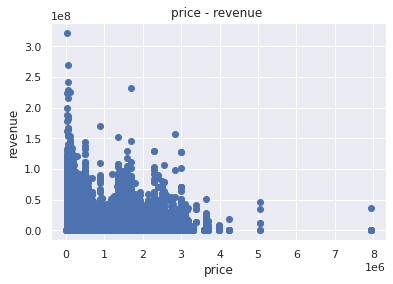

In [248]:
plt.scatter(mydata['price'], mydata['revenue'])
plt.title("price - revenue ")
plt.xlabel("price") 
plt.ylabel("revenue") 
plt.show()

#### price - revenue 특이사항
- 단가가 싼 제품일 중 좋은 매출을 거둔 것이 더 많다. (많이 살테니까)
- 엄청 비싸게 판 저거 뭐야ㅋㅋㅋㅋ
- 저 위에 동동 떠있는 애들 다시 살펴봐야한다. 
--------

### price - count

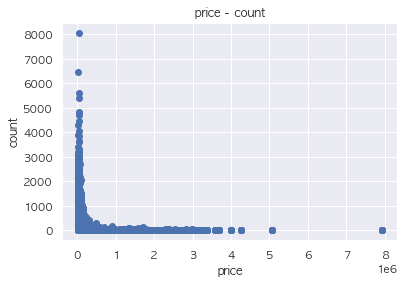

In [345]:
plt.scatter(mydata['price'], mydata['count'])
plt.title("price - count")
plt.xlabel("price") 
plt.ylabel("count") 
plt.show()

#### price-count 특이사항
- 이거 제대로 나오는 것 맞나...?
- 맞다면 홈쇼핑에는 가격장벽이 있는건가?
- 일정 수준의 가격대 이후에는 판매 개수가 비슷하다. 

-------

### count - revenue

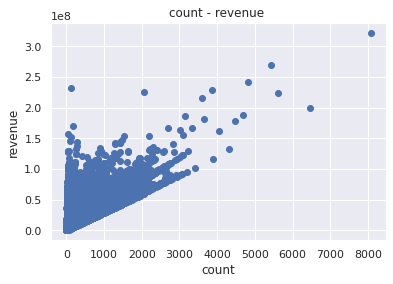

In [295]:
plt.scatter(mydata['count'], mydata['revenue'])
plt.title("count - revenue ")
plt.xlabel("count") 
plt.ylabel("revenue") 
plt.show()

#### count - revenue 특이사항
- count 변수를 내가 이상하게 설정했는지 다시 확인해야됨...
- 판매수량이 많을수록 총매출이 많은 것이 정상이지만 이 그래프 정말 신기하군
- 저 꼭대기에 있는 쟤는 4만원짜리 콩블리 자켓
-----

In [252]:
categorize = mydata['category'].groupby(mydata['category'])

In [621]:
categorize.size()

category
가구      2614
가전      6479
건강기능     790
농수축     3884
무형       937
생활용품    2877
속옷      3919
의류      4340
이미용     1305
잡화      3891
주방      6604
침구       669
Name: category, dtype: int64

In [297]:
mydata.groupby(mydata['category']).mean()

,Unnamed: 0,exposure,mother_code,code,price,revenue,year,month,date,count
category,,,,,,,,,,
가구,19004.451033,20.155290,100317.442234,201022.837414,8.434763e+05,1.115025e+07,2019.000000,6.537490,13.330910,17.379483
가전,15722.078562,20.130409,100239.960642,200749.129032,1.631382e+06,1.499100e+07,2019.000000,5.493286,14.223800,15.463927
건강기능,21313.616456,20.185868,100457.583544,201394.863291,8.332430e+04,2.544787e+07,2019.000000,7.108861,17.621519,372.739295
농수축,20234.693100,19.562685,100426.943615,201336.761586,4.641954e+04,4.272457e+07,2019.000000,6.819773,15.934861,972.194409
무형,26042.517609,22.871932,100449.779082,201540.766275,NaN,NaN,2019.005336,8.536820,16.591249,NaN
생활용품,24606.119221,20.094237,100395.612444,201227.961766,1.864539e+05,1.795182e+07,2019.000000,8.194995,15.727494,174.314027
속옷,17394.839245,20.182320,100460.445777,201430.046951,7.798127e+04,2.607730e+07,2019.000000,5.971166,15.710385,363.624486
의류,17945.519124,19.509259,100371.911060,201189.809217,1.554892e+05,2.437871e+07,2019.000000,6.134793,15.964747,384.164614
이미용,23090.176245,19.937795,100317.445211,201032.288123,5.103004e+04,3.779511e+07,2019.000000,7.723372,15.671264,801.696335


In [296]:
std_month = mydata.groupby(mydata['month']).mean()
std_month = std_month.sort_index(ascending=True)
print(std_month)

         Unnamed: 0   exposure    mother_code           code          price  \
month                                                                         
1       1553.884003  20.656775  100462.642313  201461.730956  383206.699063   
2       4285.500000  20.533497  100458.198294  201456.113717  454255.705652   
3       7339.000000  20.675827  100431.555117  201342.551169  442615.255542   
4      10728.500000  20.581462  100394.058233  201223.298049  618784.163493   
5      14288.500000  20.033714  100341.844799  201064.178041  674613.922450   
6      17643.500000  20.442341  100344.240572  201061.213589  439269.993358   
7      20878.000000  20.257834  100328.677277  201021.484822  506604.349776   
8      24183.000000  19.905997  100406.159154  201260.502021  526453.952821   
9      27403.000000  19.214516  100376.635743  201179.555073  434322.753438   
10     30615.500000  19.926486  100397.449407  201240.736727  373369.772358   
11     33682.000000  20.143743  100379.641760  20118

<AxesSubplot:xlabel='month'>

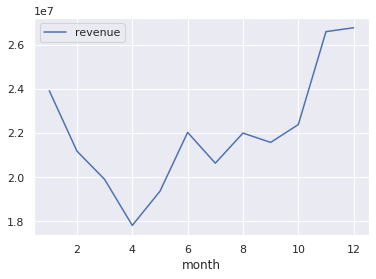

In [303]:
std_month.plot(y='revenue', use_index=True)

<AxesSubplot:xlabel='month'>

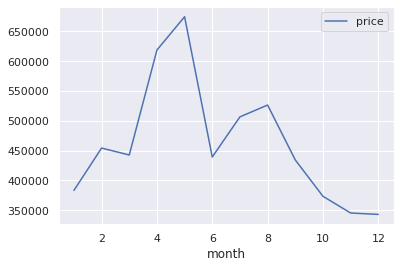

In [304]:
std_month.plot(y='price', use_index=True)

matplotlib.axes._subplots.AxesSubplot

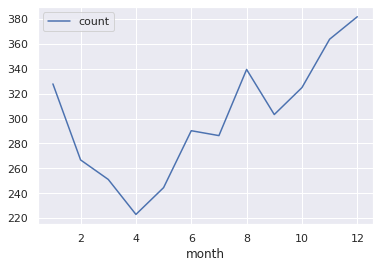

In [305]:
type(std_month.plot(y='count', use_index=True))

------

In [342]:
month_category = mydata["revenue"].groupby([mydata["month"], mydata["category"]]).sum().unstack("category")
month_category_mean = mydata["revenue"].groupby([mydata["month"], mydata["category"]]).mean().unstack("category")

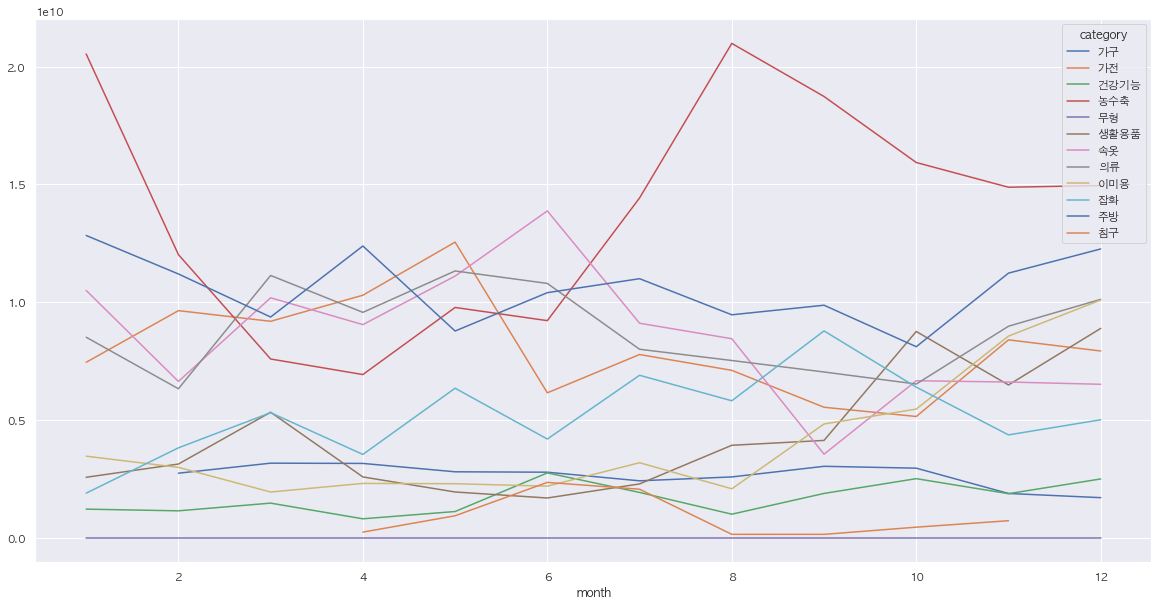

In [341]:
month_category.plot(figsize=(20,10), grid = True);

#### 위 그래프 특이사항들
- 농수축은 왜때문에 저렇게 들쭉 날쭉한지 다시 분석해보기
- 속옷은 여름에 많이산다.
- 가전도 여름에 많이 사는 경향(에어컨 때문일까?)
- 침구도 여름에 많이 사네
- 이미용은 겨울에 많이 산다(보습 때문일까?)
- 의류도 여름에 매출이 살짝 높네(왜지? 겨울옷이 더 비싸긴할텐데)
- 생활용품도 여름보단 겨울(왜지? ㅇ_ㅇ 어떤 품목이 잘팔렸는지 좀 살펴봐야겠다)

#### '아 수화야! 평균도 살펴봐야지.... 그냥 빈도수가 많은 것일수도 있잖아'

----------

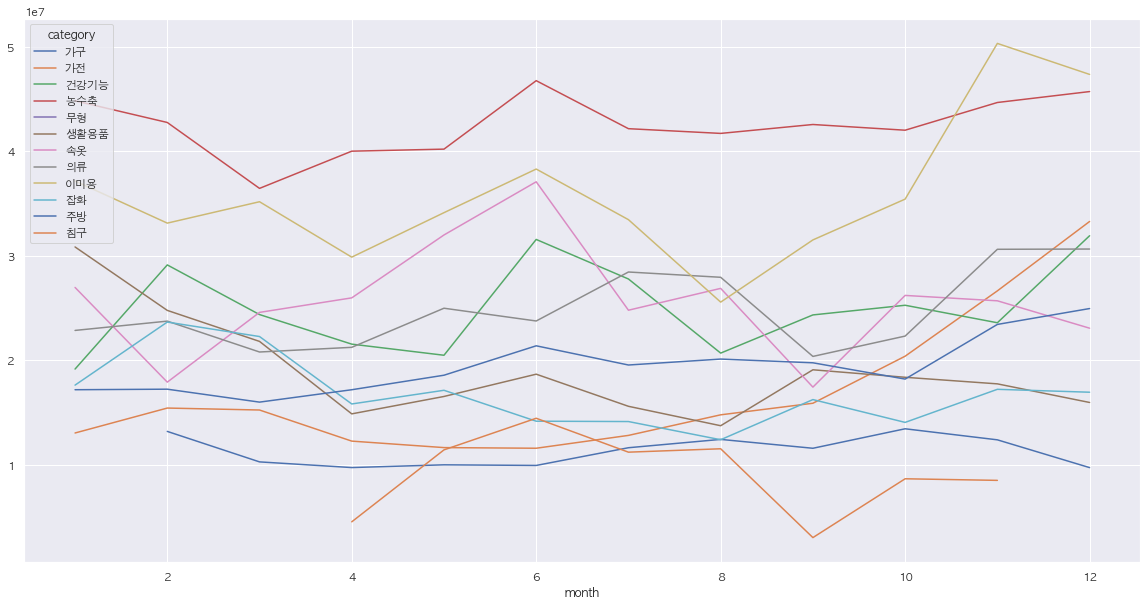

In [343]:
month_category_mean.plot(figsize=(20,10), grid = True);

#### 다시 특이사항
- 이미용은 겨울 > 여름 > 봄 > 가을
- 속옷은 여전히 여름에 잘팔린다.
- 평균으로보니 가전은 겨울(12월)에 잘 팔렸네? 여름엔 많이 팔았을 뿐인가?(매출합은 여름이 더 높은데!)
- 생활용품은겨울(1월)에 잘팔렸다.
- 건강기능도 6월이 살짝 높다.
- 나머지는 다 비슷한 것 같네 
- 보편적으로 매출이 좋은 것은 농수축(먹을 것) > 이미용(화장품) , 속옷, 건강기능식품, 의류 이정도

In [368]:
month_category_sum_count = mydata["count"].groupby([mydata["month"], mydata["category"]]).sum().unstack("category")
month_category_mean_count = mydata["count"].groupby([mydata["month"], mydata["category"]]).mean().unstack("category")

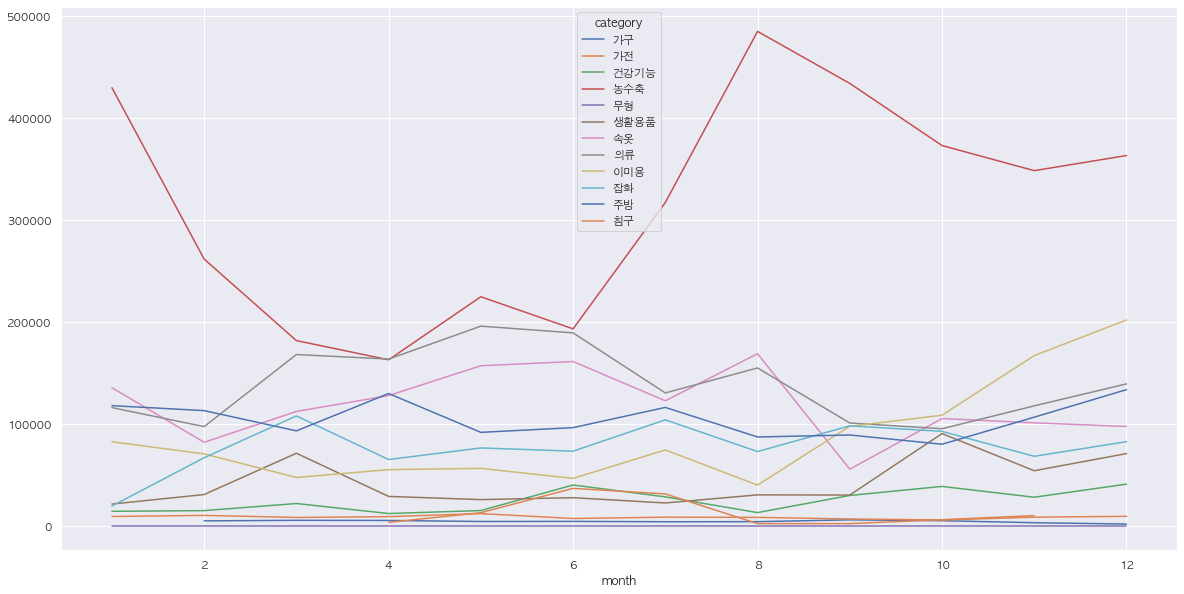

In [369]:
month_category_sum_count.plot(figsize=(20,10), grid = True);

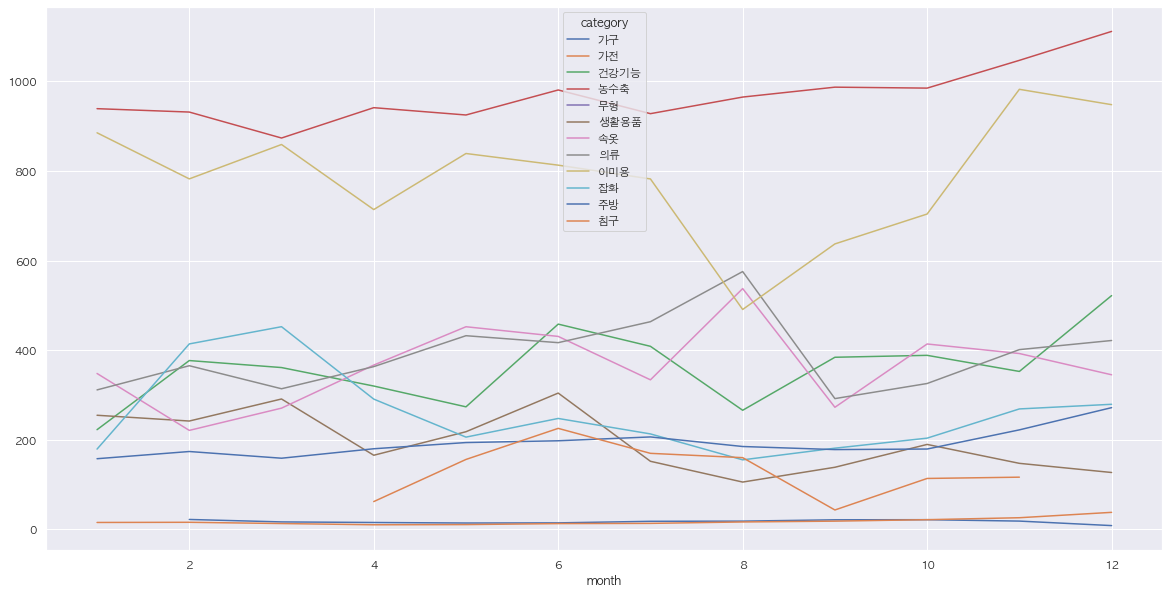

In [367]:
month_category_mean_count.plot(figsize=(20,10), grid = True);

In [450]:
new_mydata = mydata.set_index('datetime') 

In [ ]:
mydata.to_csv('/Users/aohus/Documents/workspaces/Python/BigContest/src/dummy1.csv', sep=',', na_rep='NaN')

In [451]:
new_mydata.to_csv('/Users/aohus/Documents/workspaces/Python/BigContest/src/eda1.csv', sep=',', na_rep='NaN')

In [491]:
mydata.head(3)

,datetime,exposure,mother_code,code,name,category,price,revenue,year,month,date,time,count,sex,installment
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,2099000.0,2019,1,1,06:00:00,52.606516,남성,무관
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,4371000.0,2019,1,1,06:00:00,109.548872,여성,무관
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,3262000.0,2019,1,1,06:20:00,81.754386,남성,무관


<AxesSubplot:xlabel='month', ylabel='revenue'>

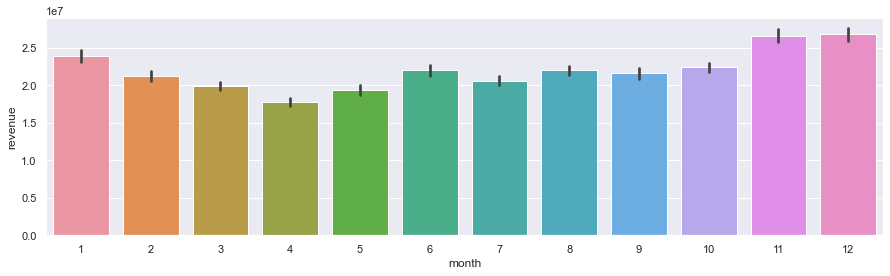

In [503]:
plt.figure(figsize=(15,4))
sns.barplot(data = mydata, x = 'month', y = 'revenue')

<AxesSubplot:xlabel='date', ylabel='revenue'>

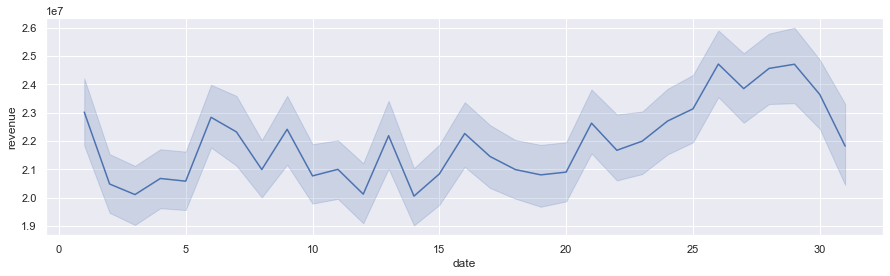

In [506]:
plt.figure(figsize=(15,4))
sns.lineplot(data = mydata, x = 'date', y = 'revenue')

<AxesSubplot:xlabel='datetime', ylabel='revenue'>

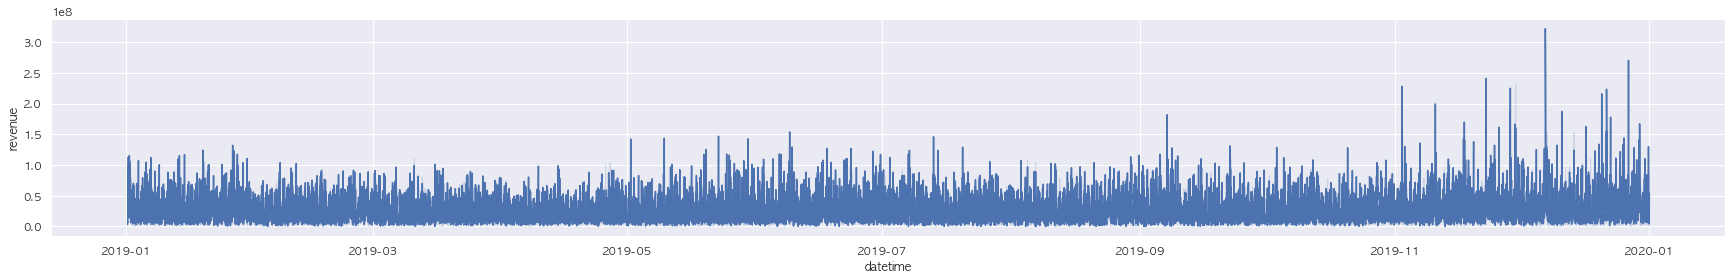

In [525]:
plt.figure(figsize=(30,4))
sns.lineplot(data = mydata, x = 'datetime', y = 'revenue')

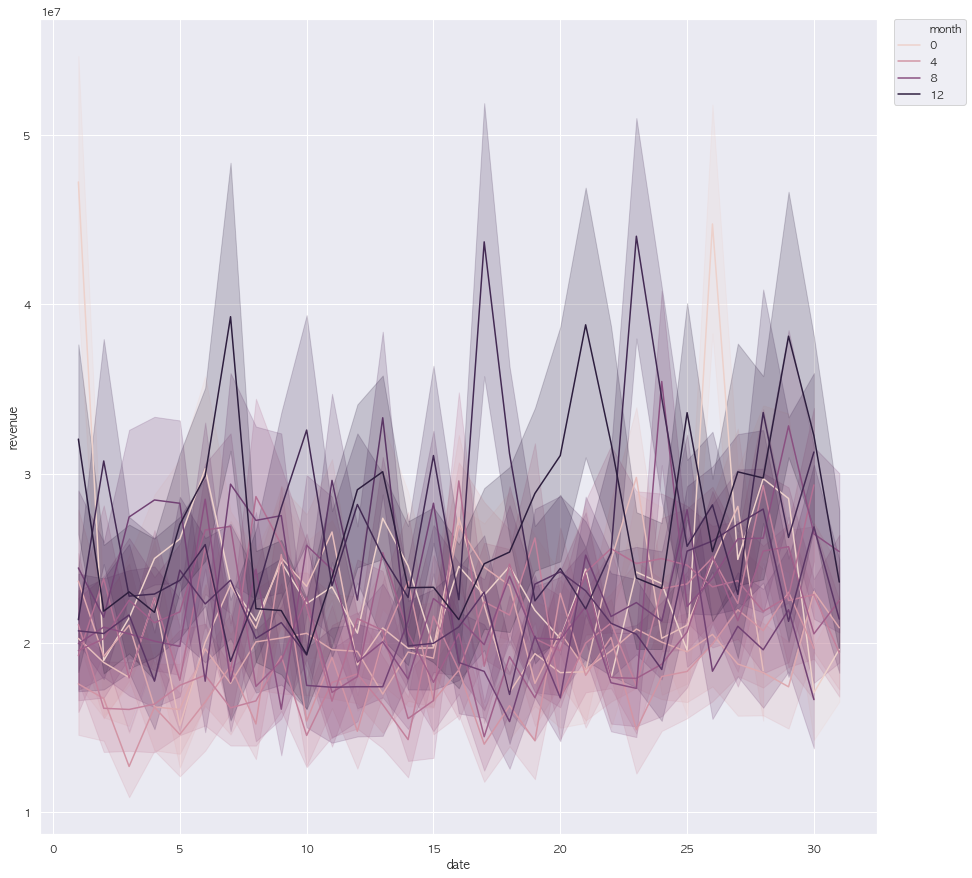

In [510]:
plt.figure(figsize=(15,15))
sns.lineplot(data = mydata, x = 'date', y = 'revenue', hue = 'month')
plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.

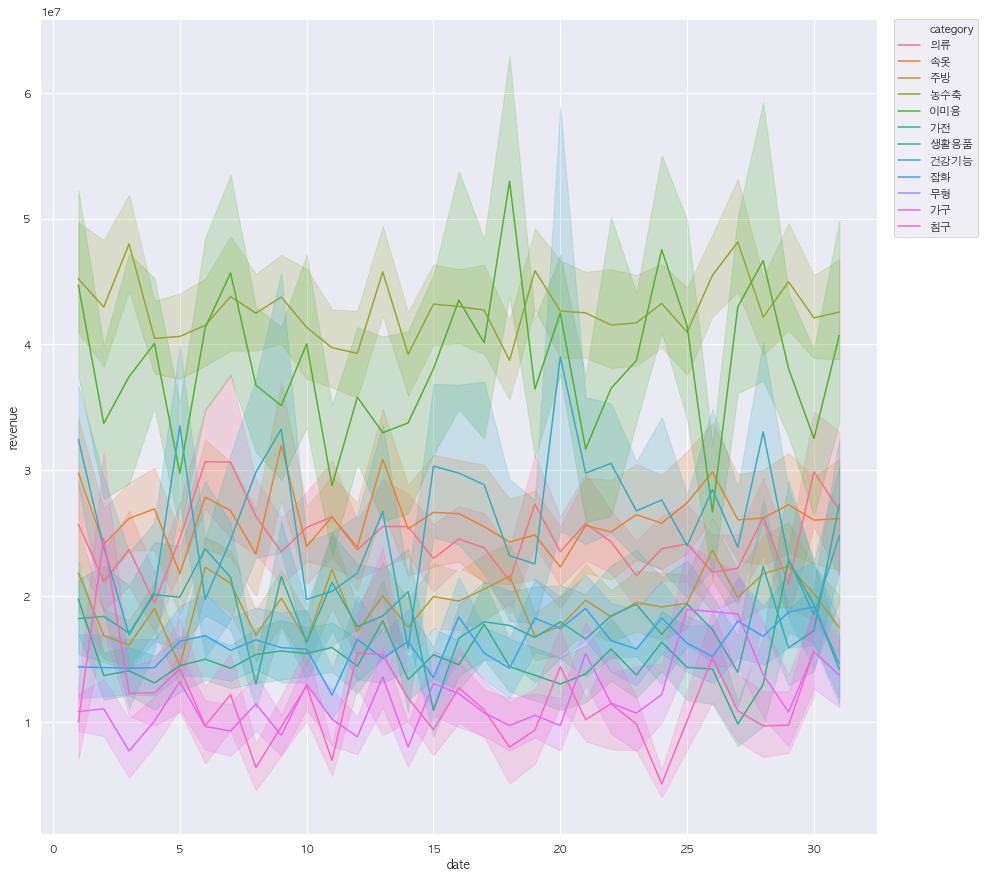

In [515]:
plt.figure(figsize=(15,15))
sns.lineplot(data = mydata, x = 'date', y = 'revenue', hue = 'category')
plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.

<Figure size 1080x1080 with 0 Axes>

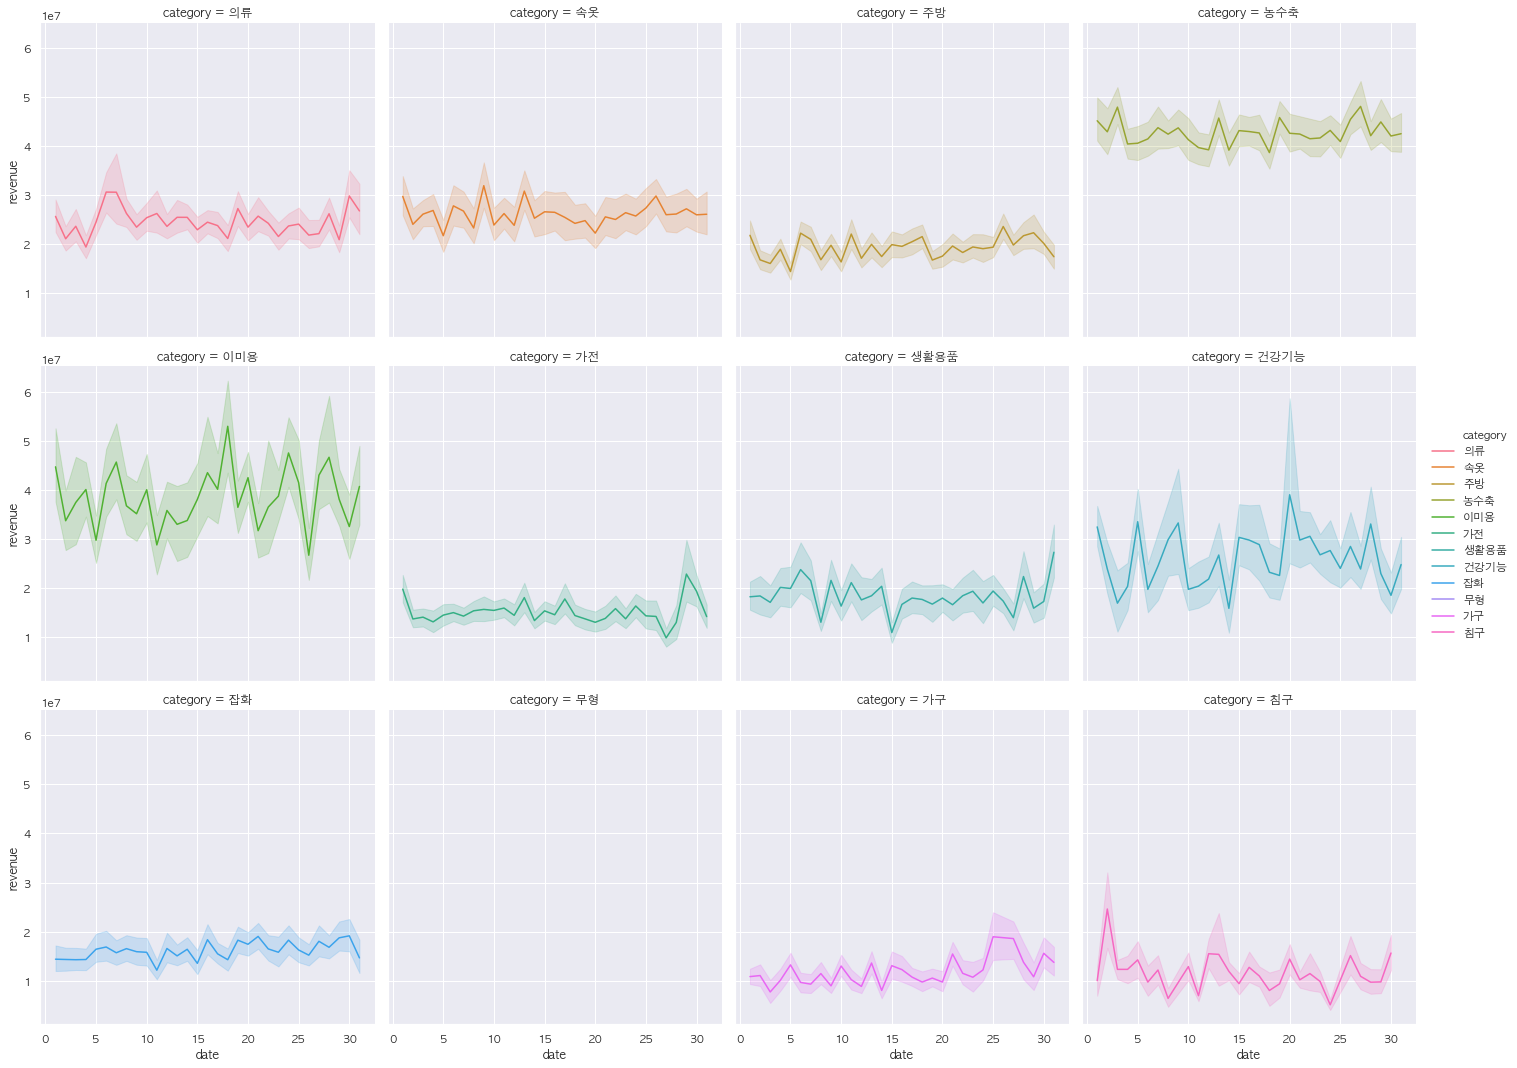

In [521]:
plt.figure(figsize= (15,15))
sns.relplot(data = mydata, x = 'date' ,y = 'revenue', kind = 'line', hue = 'category', col ='category', col_wrap=4)

<Figure size 1080x1080 with 0 Axes>

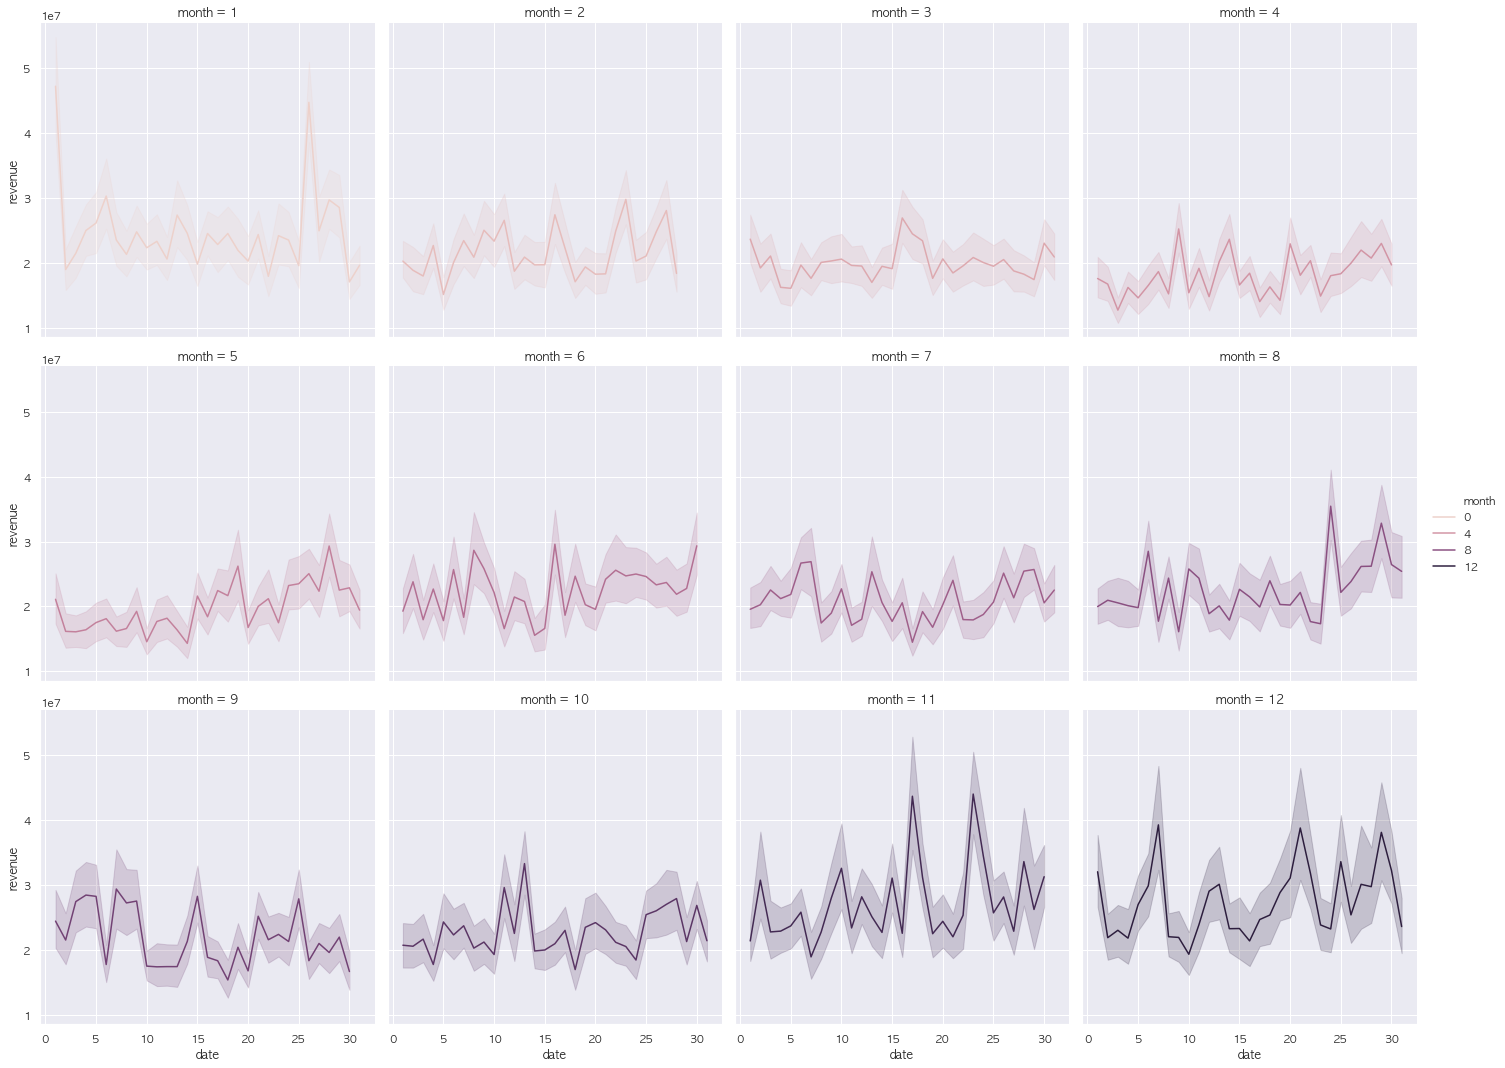

In [522]:
plt.figure(figsize= (15,15))
sns.relplot(data = mydata, x = 'date' ,y = 'revenue', kind = 'line', hue = 'month', col ='month', col_wrap=4)

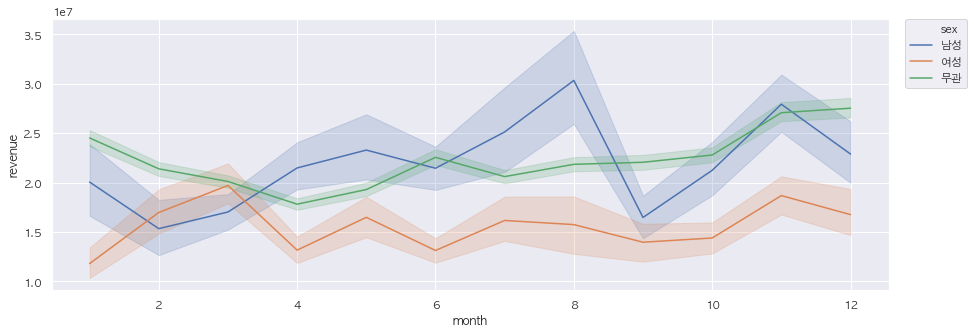

In [526]:
plt.figure(figsize=(15,5))
sns.lineplot(data = mydata, x = 'month', y = 'revenue', hue = 'sex')
plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.

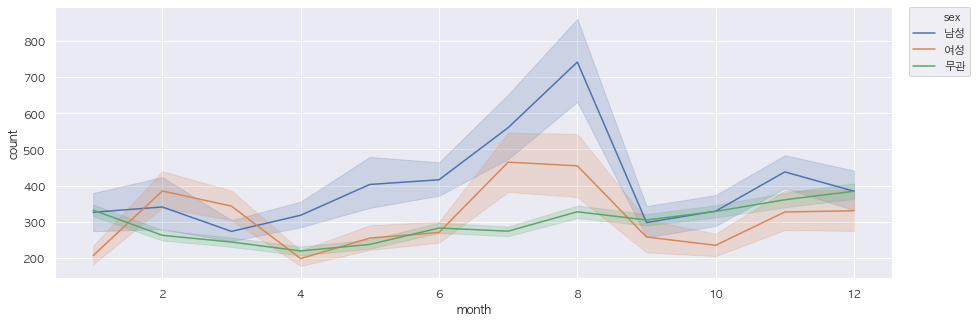

In [533]:
plt.figure(figsize=(15,5))
sns.lineplot(data = mydata, x = 'month', y = 'count', hue = 'sex')
plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.

In [531]:
len(mydata[mydata['sex'] == '남성']) # 1604
mydata[mydata['sex'] == '남성']

,datetime,exposure,mother_code,code,name,category,price,revenue,year,month,date,time,count,sex,installment
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,2099000.0,2019,1,1,06:00:00,52.606516,남성,무관
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,3262000.0,2019,1,1,06:20:00,81.754386,남성,무관
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,6672000.0,2019,1,1,06:40:00,167.218045,남성,무관
9,2019-01-01 08:00:00,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900.0,16133000.0,2019,1,1,08:00:00,269.332220,남성,무관
10,2019-01-01 08:20:00,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900.0,30061000.0,2019,1,1,08:20:00,501.853088,남성,무관
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38061,2019-12-29 08:40:00,20.0,100390,201261,[RYN] 린 남성 다이얼락 히트 웜 퍼 방한화 2종,잡화,49000.0,19726000.0,2019,12,29,08:40:00,402.571429,남성,무관
38063,2019-12-29 09:00:00,20.0,100390,201261,[RYN] 린 남성 다이얼락 히트 웜 퍼 방한화 2종,잡화,49000.0,33305000.0,2019,12,29,09:00:00,679.693878,남성,무관
38216,2019-12-31 08:20:00,20.0,100390,201261,[RYN] 린 남성 다이얼락 히트 웜 퍼 방한화 2종,잡화,49000.0,7077000.0,2019,12,31,08:20:00,144.428571,남성,무관
38218,2019-12-31 08:40:00,20.0,100390,201261,[RYN] 린 남성 다이얼락 히트 웜 퍼 방한화 2종,잡화,49000.0,12394000.0,2019,12,31,08:40:00,252.938776,남성,무관


In [532]:
print(len(mydata[mydata['sex'] == '여성'])) # 1347
mydata[mydata['sex'] == '여성']

1347


,datetime,exposure,mother_code,code,name,category,price,revenue,year,month,date,time,count,sex,installment
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,4371000.0,2019,1,1,06:00:00,109.548872,여성,무관
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,6955000.0,2019,1,1,06:20:00,174.310777,여성,무관
5,2019-01-01 06:40:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,9337000.0,2019,1,1,06:40:00,234.010025,여성,무관
26,2019-01-01 14:00:00,NaN,100377,201226,그렉노먼 여성 구스다운 롱 벤치코트,의류,119000.0,20841000.0,2019,1,1,14:00:00,175.134454,여성,무관
28,2019-01-01 14:30:00,NaN,100377,201226,그렉노먼 여성 구스다운 롱 벤치코트,의류,119000.0,47294000.0,2019,1,1,14:30:00,397.428571,여성,무관
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38062,2019-12-29 08:40:00,NaN,100390,201264,[RYN] 린 여성 다이얼락 히트 웜 퍼 방한화 2종,잡화,49000.0,18074000.0,2019,12,29,08:40:00,368.857143,여성,무관
38064,2019-12-29 09:00:00,NaN,100390,201264,[RYN] 린 여성 다이얼락 히트 웜 퍼 방한화 2종,잡화,49000.0,28391000.0,2019,12,29,09:00:00,579.408163,여성,무관
38217,2019-12-31 08:20:00,NaN,100390,201264,[RYN] 린 여성 다이얼락 히트 웜 퍼 방한화 2종,잡화,49000.0,6997000.0,2019,12,31,08:20:00,142.795918,여성,무관
38219,2019-12-31 08:40:00,NaN,100390,201264,[RYN] 린 여성 다이얼락 히트 웜 퍼 방한화 2종,잡화,49000.0,13563000.0,2019,12,31,08:40:00,276.795918,여성,무관


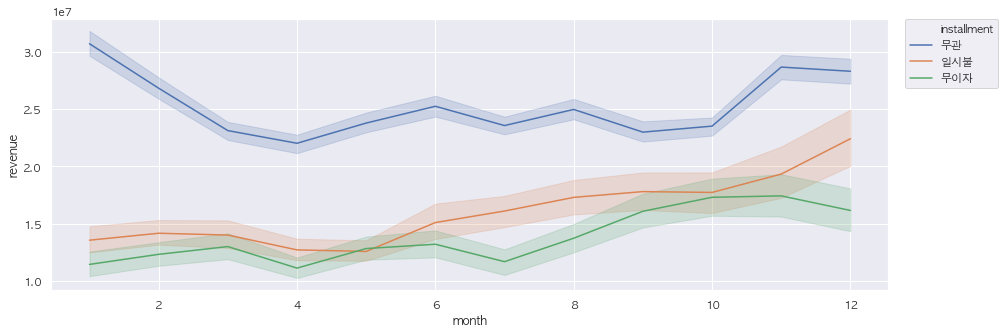

In [527]:
plt.figure(figsize=(15,5))
sns.lineplot(data = mydata, x = 'month', y = 'revenue', hue = 'installment')
plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.

In [ ]:
mydata.sort_values(by='revenue' ,ascending=False).head(10)

--------
#### 동일 머더코드별 분석

In [550]:
mother_code_mean_revenue = mydata.groupby(mydata['mother_code'])['revenue'].mean()
mother_code_sum_revenue = mydata.groupby(mydata['mother_code'])['revenue'].sum()
mother_code_mean_count = mydata.groupby(mydata['mother_code'])['count'].mean()
mother_code_mean_price = mydata.groupby(mydata['mother_code'])['price'].mean()

In [552]:
mother_code_df = pd.DataFrame(dict( mother_code_sum_revenue = mother_code_sum_revenue, mother_code_mean_revenue = mother_code_mean_revenue,mother_code_mean_count = mother_code_mean_count, mother_code_mean_price = mother_code_mean_price))

In [553]:
mother_code_df.to_csv('/Users/aohus/Documents/workspaces/Python/BigContest/src/mothercode.csv', sep=',', na_rep='NaN')

In [560]:
"""
* 매출합 순위 
1. lg 울트라 TV -  * 18건(2618) 
2. 비버리힐즈폴로클럽 남성기초세트 * 3건 (488)
3. 일시불 LG전자 매직스페이스 냉장고 - * 6건(620)
4. 무이자 쿠쿠전기밥솥 10인용 - * 12건(1507)
5. LG 통돌이 세탁기 - * 6건(604)
6. 한일 대용량 스텐 분쇄믹서기 - * 3건(401)
7. 쿠첸 풀스텐 압력밥솥 10인용 (A1) - * 12건(1308)
8. 보루네오 루나 유로탑 멀티수납형 LED 침대 SS 슈퍼싱글- * 9건(793)
9. 안동간고등어 20팩 - * 3건(318)
10. 멋진밥상 흥양농협 햅쌀 20kg - * 3건(264)
"""
mother_code_df.sort_values(by='mother_code_sum_revenue', ascending=False)[0:10]

,mother_code_sum_revenue,mother_code_mean_revenue,mother_code_mean_count,mother_code_mean_price
mother_code,,,,
100148,2.636249e+10,1.006971e+07,5.574158,2.118747e+06
100074,2.255913e+10,4.622773e+07,1161.500690,3.980000e+04
100155,2.030164e+10,3.274458e+07,22.788948,1.450935e+06
100837,2.011224e+10,1.334588e+07,63.243862,2.080000e+05
100150,1.894082e+10,3.135897e+07,67.259828,4.662351e+05
100255,1.816800e+10,4.530672e+07,412.629537,1.098000e+05
100448,1.507012e+10,1.152150e+07,70.875171,1.618226e+05
100205,1.502411e+10,1.896984e+07,31.952705,6.012273e+05
100253,1.439195e+10,4.525770e+07,1464.650526,3.090000e+04


### 더 알아볼 것
- 각각이 매번 매출이 비슷할까? 
- 시간대 별로는 어떤 차이가 있을까? (20분씩 3번 나눠서 하니까)


In [596]:
mydata[mydata['mother_code'] == 100849][0:20]

,datetime,exposure,mother_code,code,name,category,price,revenue,year,month,date,time,count,sex,installment
34,2019-01-01 16:40:00,20.0,100849,202512,멋진밥상 흥양농협 햅쌀 20kg,농수축,61000.0,83893000.0,2019,1,1,16:40:00,1375.295082,무관,무관
385,2019-01-05 16:00:00,20.0,100849,202512,멋진밥상 흥양농협 햅쌀 20kg,농수축,61000.0,44297000.0,2019,1,5,16:00:00,726.180328,무관,무관
386,2019-01-05 16:20:00,20.0,100849,202512,멋진밥상 흥양농협 햅쌀 20kg,농수축,61000.0,65082000.0,2019,1,5,16:20:00,1066.918033,무관,무관
387,2019-01-05 16:40:00,20.0,100849,202512,멋진밥상 흥양농협 햅쌀 20kg,농수축,61000.0,69522000.0,2019,1,5,16:40:00,1139.704918,무관,무관
578,2019-01-07 15:00:00,20.0,100849,202512,멋진밥상 흥양농협 햅쌀 20kg,농수축,61000.0,31814000.0,2019,1,7,15:00:00,521.540984,무관,무관
579,2019-01-07 15:20:00,20.0,100849,202512,멋진밥상 흥양농협 햅쌀 20kg,농수축,61000.0,50993000.0,2019,1,7,15:20:00,835.950820,무관,무관
580,2019-01-07 15:40:00,20.0,100849,202512,멋진밥상 흥양농협 햅쌀 20kg,농수축,61000.0,52116000.0,2019,1,7,15:40:00,854.360656,무관,무관
653,2019-01-08 14:00:00,20.0,100849,202512,멋진밥상 흥양농협 햅쌀 20kg,농수축,61000.0,36664000.0,2019,1,8,14:00:00,601.049180,무관,무관
654,2019-01-08 14:20:00,20.0,100849,202512,멋진밥상 흥양농협 햅쌀 20kg,농수축,61000.0,54587000.0,2019,1,8,14:20:00,894.868852,무관,무관
655,2019-01-08 14:40:00,20.0,100849,202512,멋진밥상 흥양농협 햅쌀 20kg,농수축,61000.0,41662000.0,2019,1,8,14:40:00,682.983607,무관,무관


In [561]:
"""
* 매출 평균 순위
1. 고창 꿀 고구마 10kg - 3 * 2건
2. 아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차) - 27 * 2건
3. 완도꼬마활전복 1.3kg -  6 * 3건
4. 셀렉프로 뚝배기 전기밥솥(멀티쿠커) - 3 * 2건
5. 램프쿡 자동회전냄비 - 3 * 2건
6. 국내산 손질 햇 갑오징어 9팩 - 17 * 3건
7. [VONIN]보닌 남성기초세트 - 27 * 3건
8. 코몽트 덤블 플리스 자켓 2종 - 12 * 3건
9. 우리바다 손질왕꼬막 24팩 - 22 * 3건
10. 피시원 국내산 손질꽃게 7팩 - 20 * 3건(61)
"""

mother_code_df.sort_values(by='mother_code_mean_revenue', ascending=False)[0:10]

,mother_code_sum_revenue,mother_code_mean_revenue,mother_code_mean_count,mother_code_mean_price
mother_code,,,,
100699,4.966450e+08,8.277417e+07,2678.775620,30900.000000
100079,4.140037e+09,7.666735e+07,767.440959,99900.000000
100548,1.383041e+09,7.279163e+07,2434.502728,29900.000000
100264,4.346300e+08,7.243833e+07,916.940928,79000.000000
100638,4.282820e+08,7.138033e+07,654.865443,109000.000000
100317,3.524781e+09,6.650530e+07,1332.771581,49900.000000
100327,5.238394e+09,6.388285e+07,1183.015808,54000.000000
100418,2.355049e+09,6.364997e+07,1576.968407,41521.621622
100435,4.200858e+09,6.364936e+07,1595.222146,39900.000000


In [608]:
mydata['dayofweek'] = mydata['datetime'].dt.dayofweek

In [610]:
mydata.to_csv('/Users/aohus/Documents/workspaces/Python/BigContest/src/dummy2.csv', sep=',', na_rep='NaN')

<AxesSubplot:xlabel='dayofweek', ylabel='revenue'>

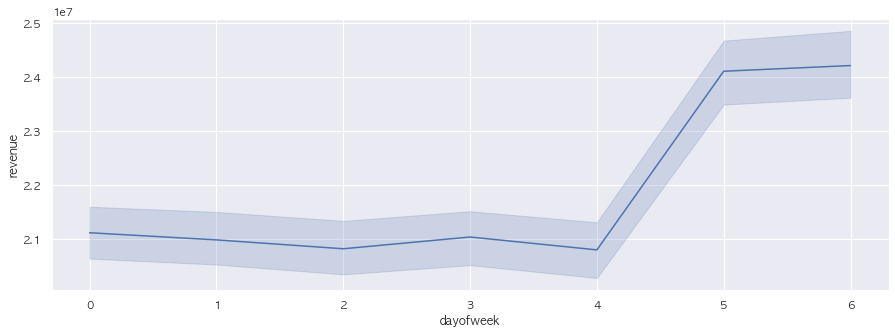

In [613]:
plt.figure(figsize=(15,5))
sns.lineplot(data = mydata, x = 'dayofweek', y = 'revenue')
# plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.

<AxesSubplot:xlabel='dayofweek', ylabel='revenue'>

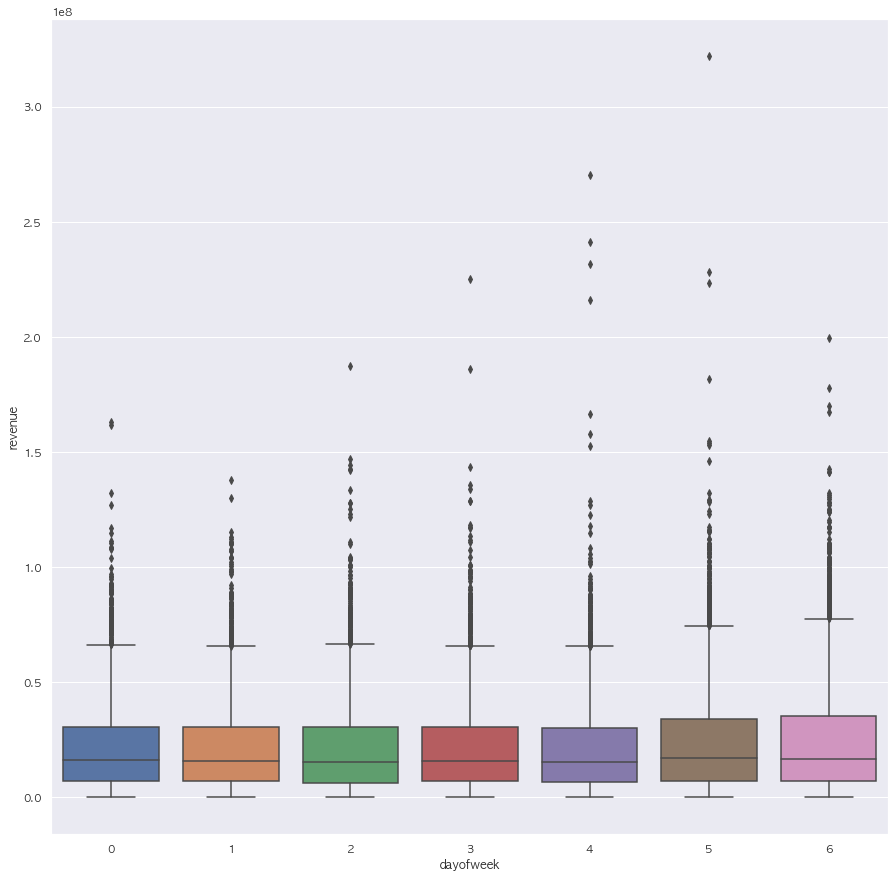

In [639]:
plt.figure(figsize=(15,15))
sns.boxplot(data = mydata, x = 'dayofweek', y = 'revenue')
# plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

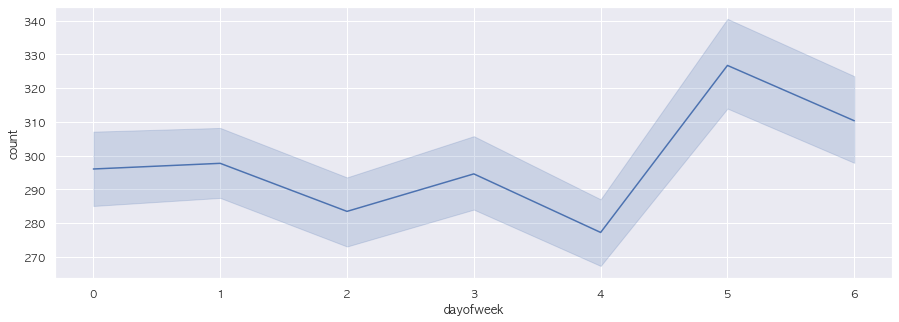

In [615]:
plt.figure(figsize=(15,5))
sns.lineplot(data = mydata, x = 'dayofweek', y = 'count')
# plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.

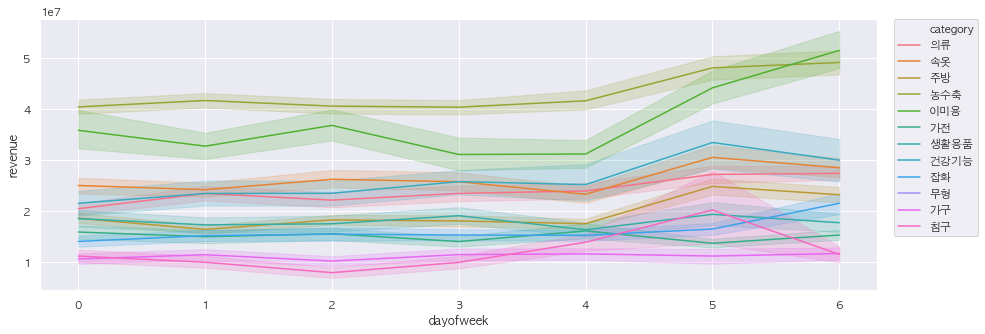

In [614]:
plt.figure(figsize=(15,5))
sns.lineplot(data = mydata, x = 'dayofweek', y = 'revenue', hue = 'category')
plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

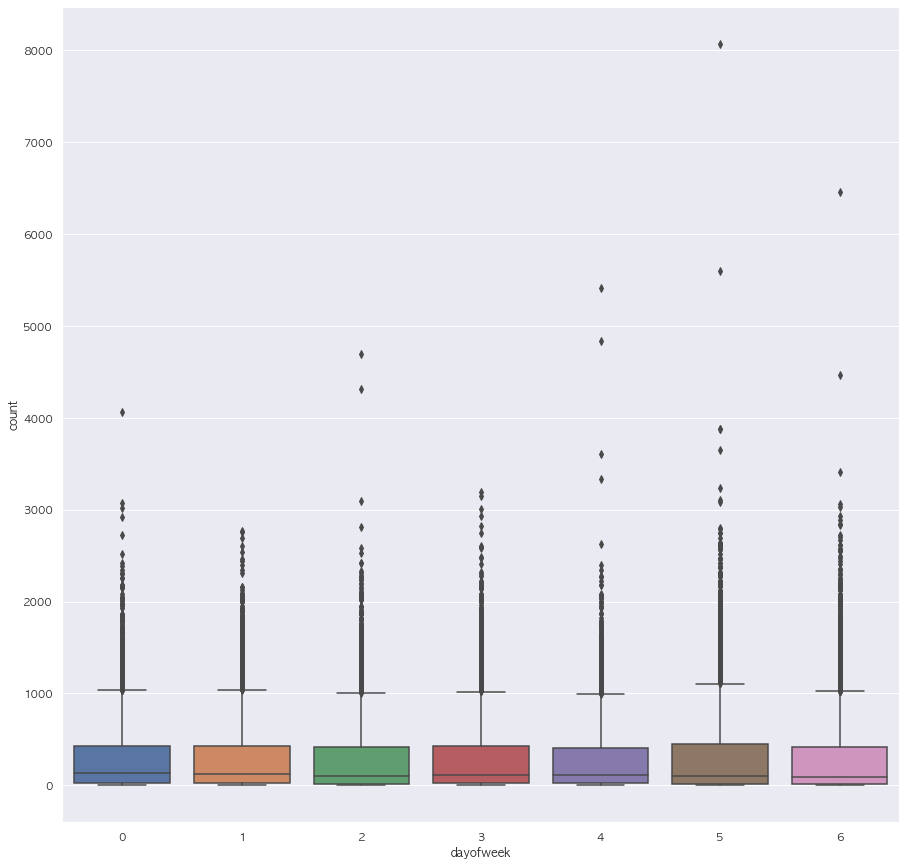

In [638]:
plt.figure(figsize=(15,15))
sns.boxplot(data = mydata, x = 'dayofweek', y = 'count')
#plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

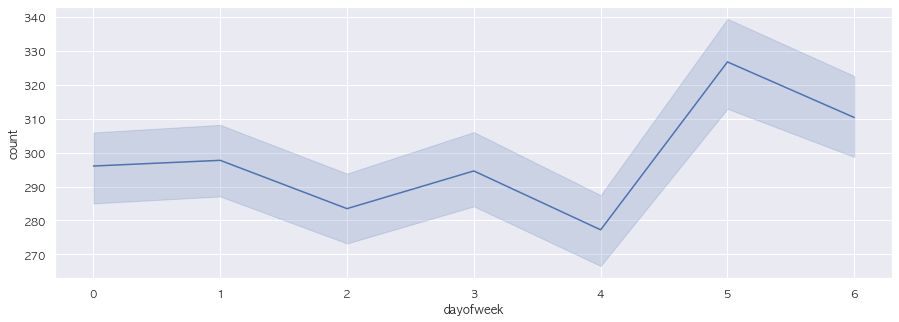

In [633]:
plt.figure(figsize=(15,5))
sns.lineplot(data = mydata, x = 'dayofweek', y = 'count')
#plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.

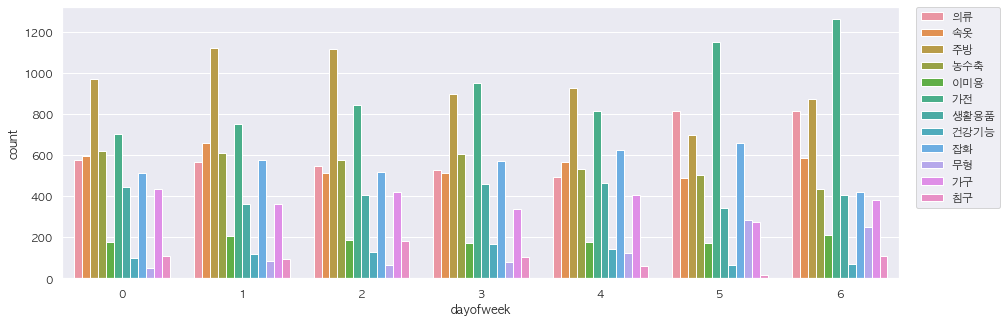

In [643]:
plt.figure(figsize=(15,5))
sns.countplot(data = mydata, x = 'dayofweek', hue = "category")
plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.

In [662]:
mydata['hour'] = pd.to_datetime(mydata['datetime'], format='%H').dt.hour

In [667]:
mydata['minute'] = pd.to_datetime(mydata['datetime'], format='%M').dt.minute

<AxesSubplot:xlabel='time', ylabel='revenue'>

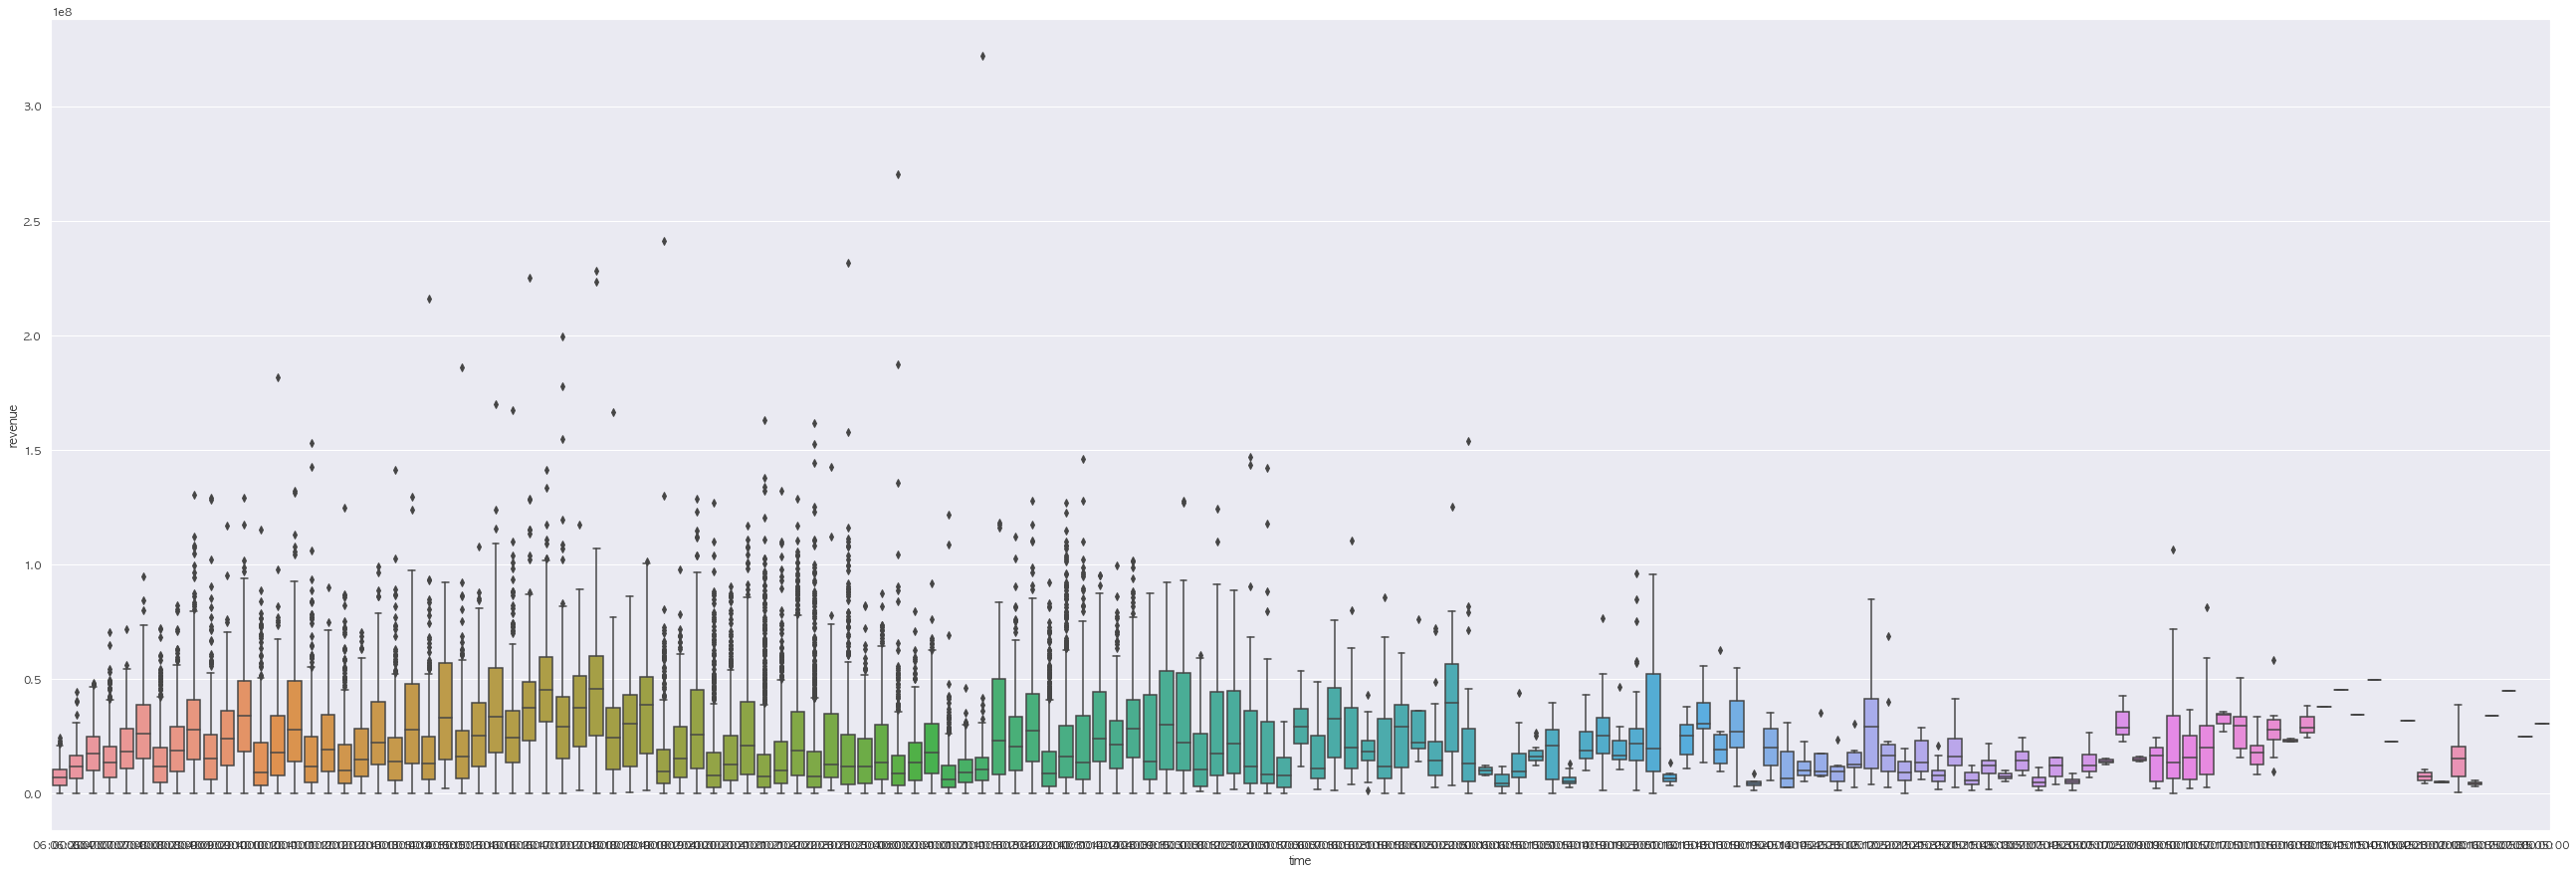

In [678]:
plt.figure(figsize=(45,15))
sns.boxplot(data = mydata, x = 'time', y = 'revenue')
# plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.

<AxesSubplot:xlabel='hour', ylabel='revenue'>

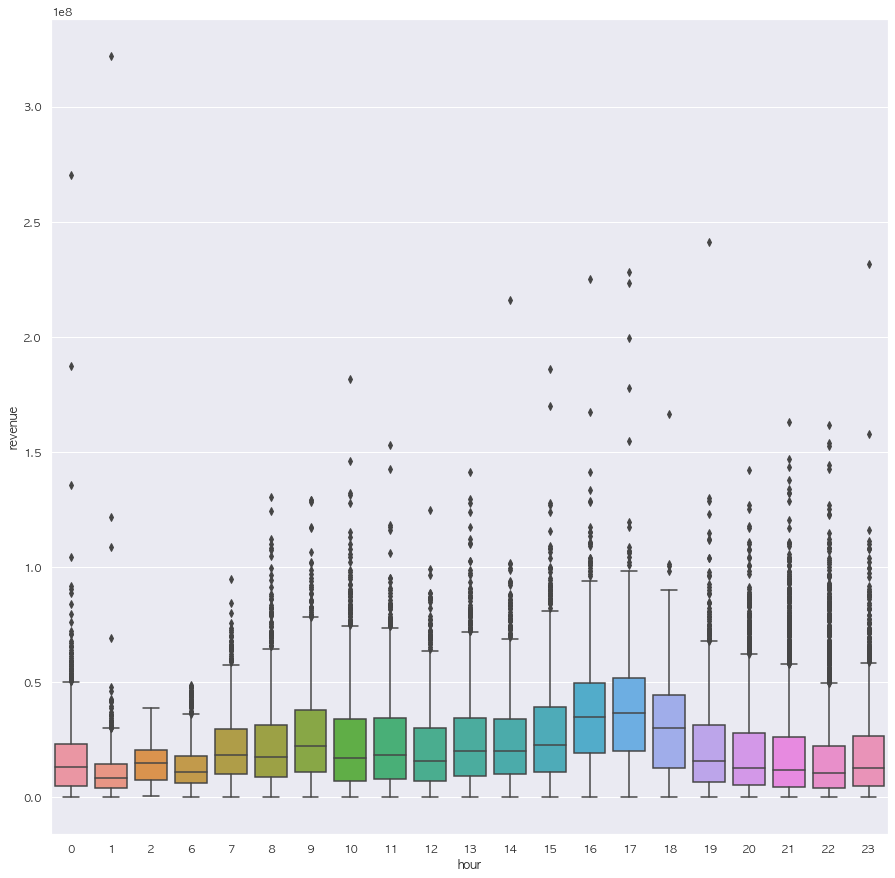

In [666]:
plt.figure(figsize=(15,15))
sns.boxplot(data = mydata, x = 'hour', y = 'revenue')
# plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.

<AxesSubplot:xlabel='minute', ylabel='revenue'>

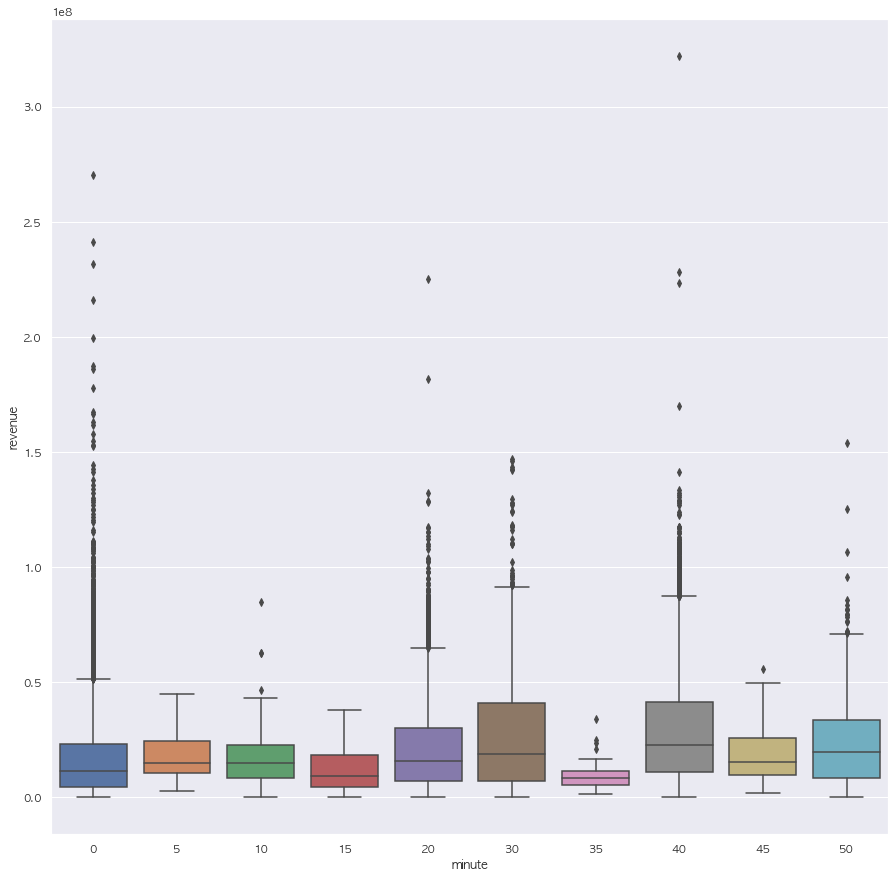

In [668]:
plt.figure(figsize=(15,15))
sns.boxplot(data = mydata, x = 'minute', y = 'revenue')
# plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.